In [1]:
import pandas as pd

file_path = 'HPC/scan_results.csv'
data = pd.read_csv(file_path)
data.head()

,file_path,package_name,version,malicious_count,suspicious_count,undetected_count,harmless_count,popular_threat_name,popular_threat_category,suggested_threat_label
0,Dataset/data/10Cent10/999.0.4/10Cent10-999.0.4...,10Cent10,999.0.4,6,0.0,56.0,0.0,"python, expl, reverseshell",trojan,trojan.python/expl
1,Dataset/data/10Cent11/999.0.4/10Cent11-999.0.4...,10Cent11,999.0.4,6,0.0,56.0,0.0,"python, expl, reverseshell",trojan,trojan.python/expl
2,Dataset/data/11cent/999.0.0/11Cent-999.0.0.tar.gz,11cent,999.0.0,0,0.0,60.0,0.0,NaN,NaN,NaN
3,Dataset/data/11cent/999.0.1/11Cent-999.0.1.tar.gz,11cent,999.0.1,0,0.0,61.0,0.0,NaN,NaN,NaN
4,Dataset/data/11cent/999.0.2/11Cent-999.0.2.tar.gz,11cent,999.0.2,0,0.0,62.0,0.0,NaN,NaN,NaN


In [3]:
import matplotlib.pyplot as plt

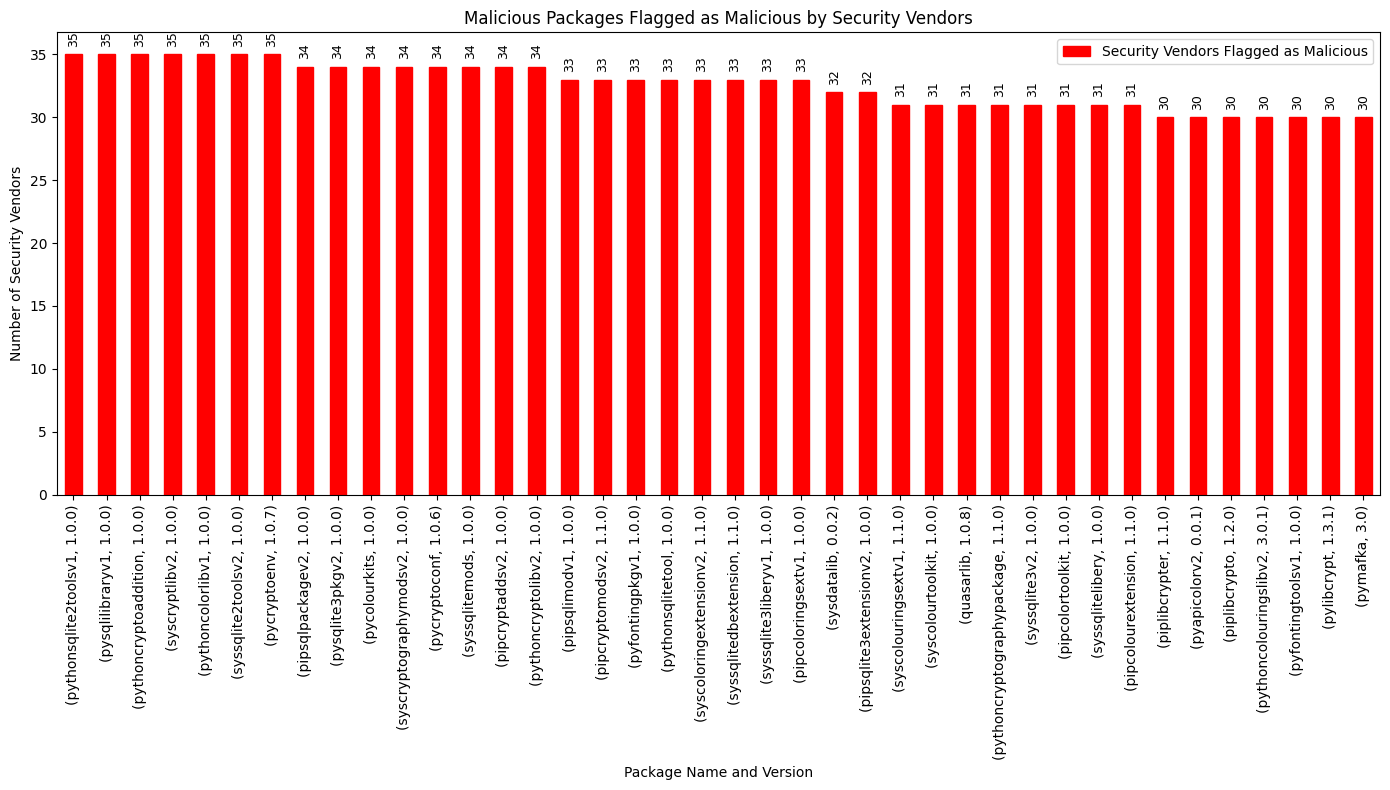

In [7]:
# Plotting packages with versions that have the most malicious counts

data['malicious_count'] = pd.to_numeric(data['malicious_count'], errors='coerce').fillna(0)

top_malicious_versions = data.groupby(['package_name', 'version'])['malicious_count'].sum().sort_values(ascending=False).head(40)

plt.figure(figsize=(14, 8)) 
ax = top_malicious_versions.plot(kind='bar', color='red', edgecolor='red', label='Security Vendors Flagged as Malicious')

for i, value in enumerate(top_malicious_versions):
    ax.text(i, value + 0.6, str(int(value)), ha='center', va='bottom', fontsize=9, rotation=90)

plt.title('Malicious Packages Flagged as Malicious by Security Vendors')
plt.xlabel('Package Name and Version')
plt.ylabel('Number of Security Vendors')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig('Malicious Packages Flagged as Malicious by Security Vendors.png', dpi=600)
plt.show()

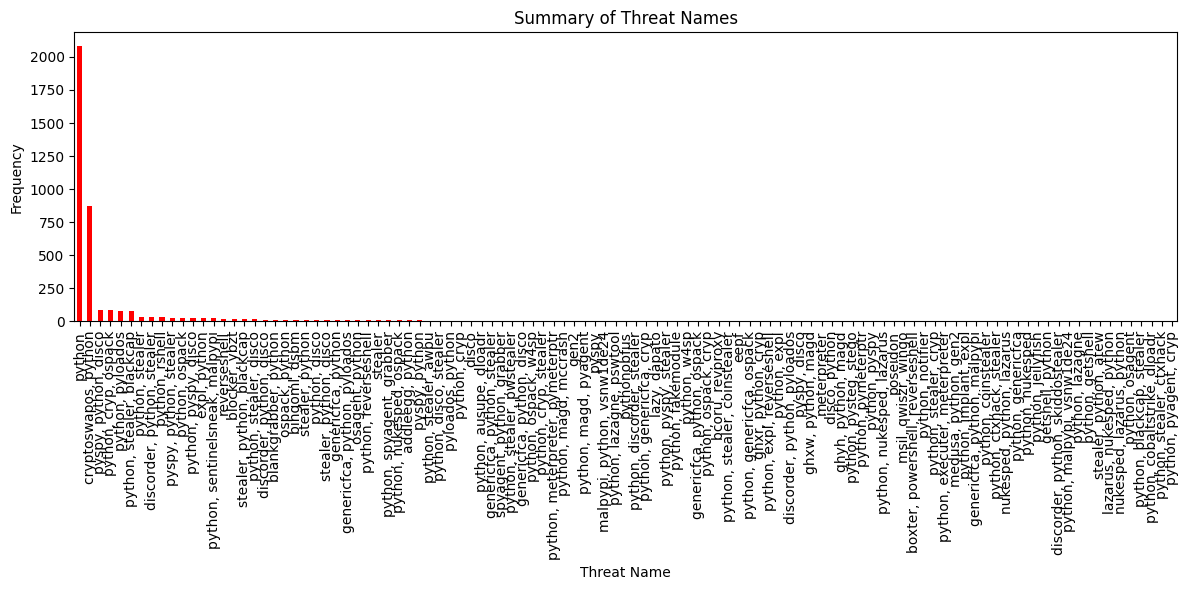

In [8]:
# Plotting the threat names

common_threat_names = data['popular_threat_name'].value_counts()

plt.figure(figsize=(12, 6))
common_threat_names.plot(kind='bar', color='red')
plt.title('Summary of Threat Names')
plt.xlabel('Threat Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Summary of Threat Names.png', dpi=600)
plt.show()

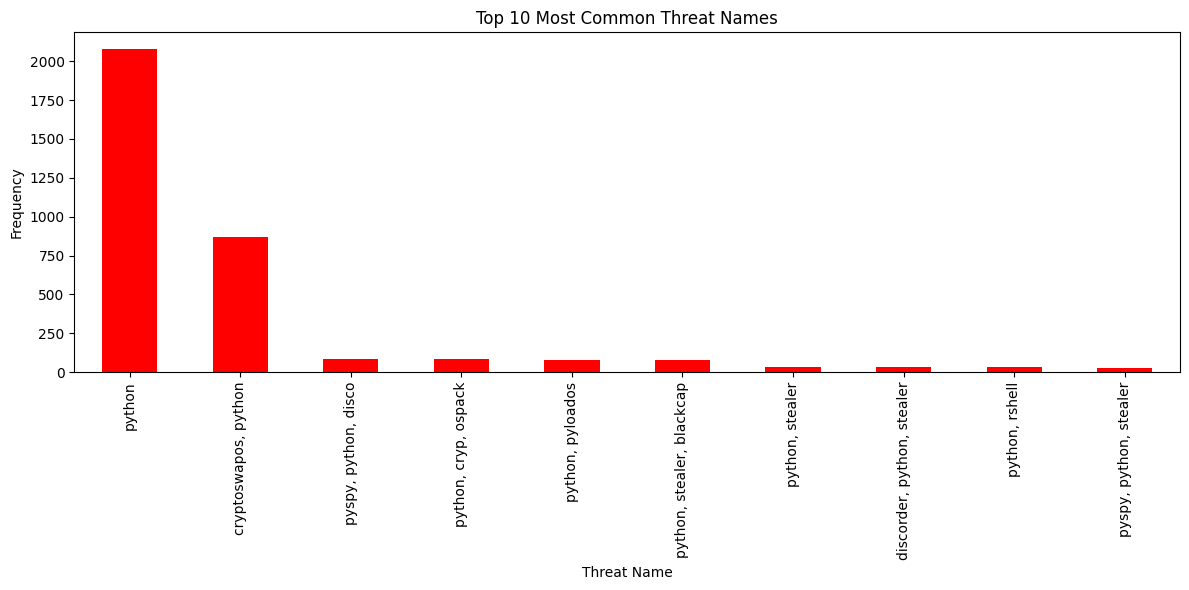

In [9]:
# Plotting the most common threat names

common_threat_names = data['popular_threat_name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
common_threat_names.plot(kind='bar', color='red')
plt.title('Top 10 Most Common Threat Names')
plt.xlabel('Threat Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Top 10 Most Common Threat Names.png', dpi=600)
plt.show()

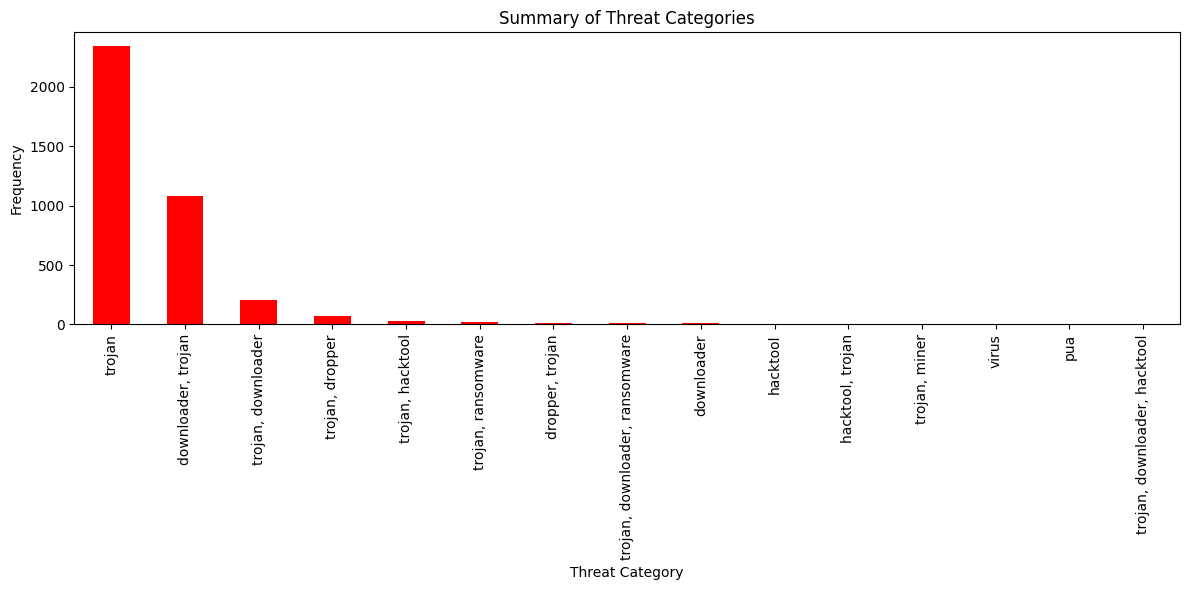

In [10]:
# Plotting the threat categories

common_threat_categories = data['popular_threat_category'].value_counts()

plt.figure(figsize=(12, 6))
common_threat_categories.plot(kind='bar', color='red')
plt.title('Summary of Threat Categories')
plt.xlabel('Threat Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Summary of Threat Categories.png', dpi=600)
plt.show()

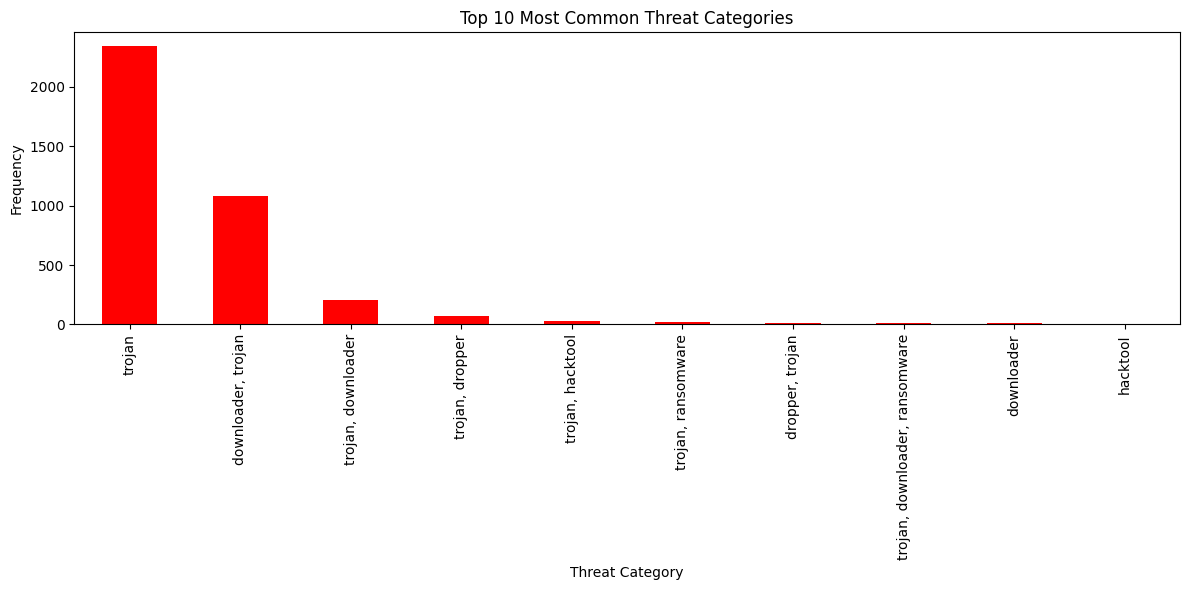

In [11]:
# Plotting the most common threat categories

common_threat_categories = data['popular_threat_category'].value_counts().head(10)

plt.figure(figsize=(12, 6))
common_threat_categories.plot(kind='bar', color='red')
plt.title('Top 10 Most Common Threat Categories')
plt.xlabel('Threat Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Top 10 Most Common Threat Categories.png', dpi=600)
plt.show()

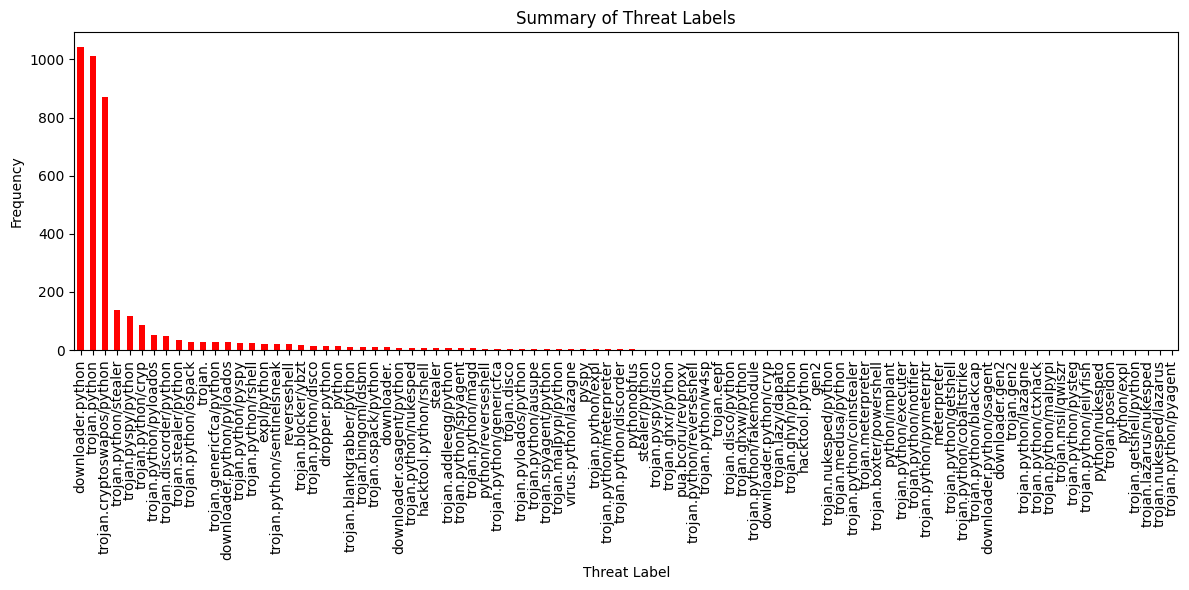

In [12]:
# Plotting the threat labels

common_threat_labels = data['suggested_threat_label'].value_counts()

plt.figure(figsize=(12, 6))
common_threat_labels.plot(kind='bar', color='red')
plt.title('Summary of Threat Labels')
plt.xlabel('Threat Label')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Summary of Threat Labels.png', dpi=600)
plt.show()

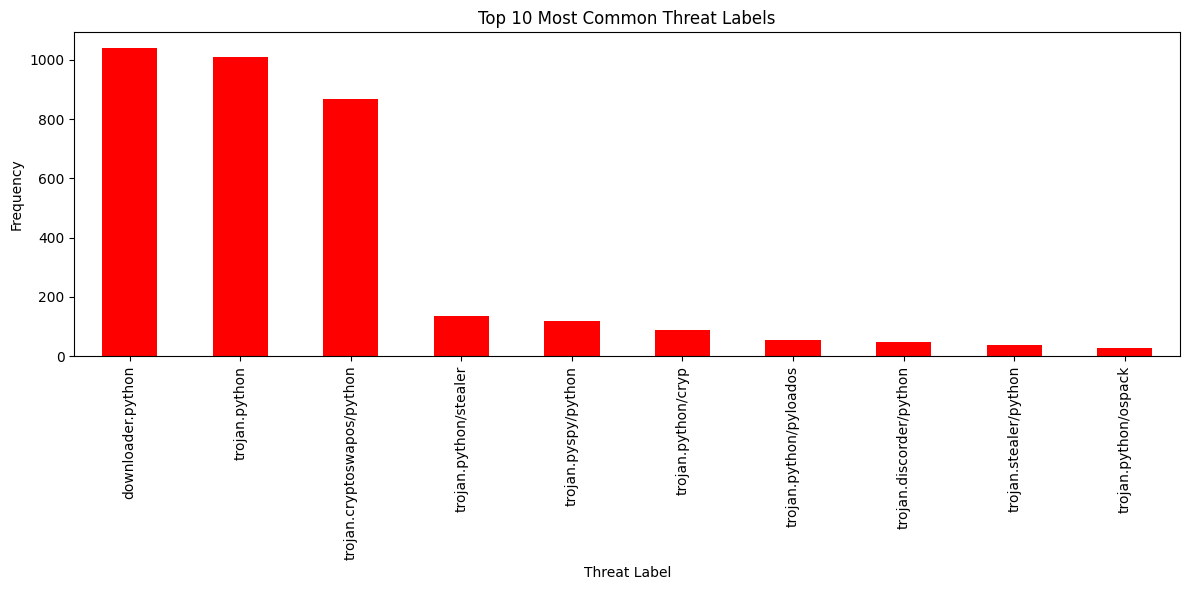

In [13]:
# Plotting the most common threat labels

common_threat_labels = data['suggested_threat_label'].value_counts().head(10)

plt.figure(figsize=(12, 6))
common_threat_labels.plot(kind='bar', color='red')
plt.title('Top 10 Most Common Threat Labels')
plt.xlabel('Threat Label')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Top 10 Most Common Threat Labels.png', dpi=600)
plt.show()

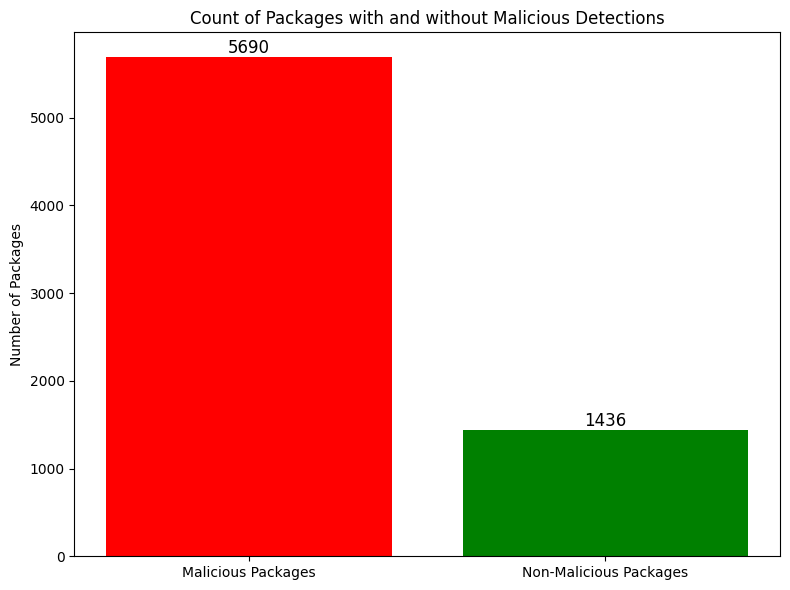

In [14]:
# Adjusting the calculation to remove the grouping by package_name
malicious_packages_count_all = (data['malicious_count'] > 0).sum()
non_malicious_packages_count_all = (data['malicious_count'] == 0).sum()

# Plot the updated bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(['Malicious Packages', 'Non-Malicious Packages'], [malicious_packages_count_all, non_malicious_packages_count_all], color=['red', 'green'])

# Annotate the bar chart with the count values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=12)

plt.title('Count of Packages with and without Malicious Detections')
plt.ylabel('Number of Packages')
plt.tight_layout()
plt.savefig('Count of Packages with and without Malicious Detections (including all version).png', dpi=600)
plt.show()

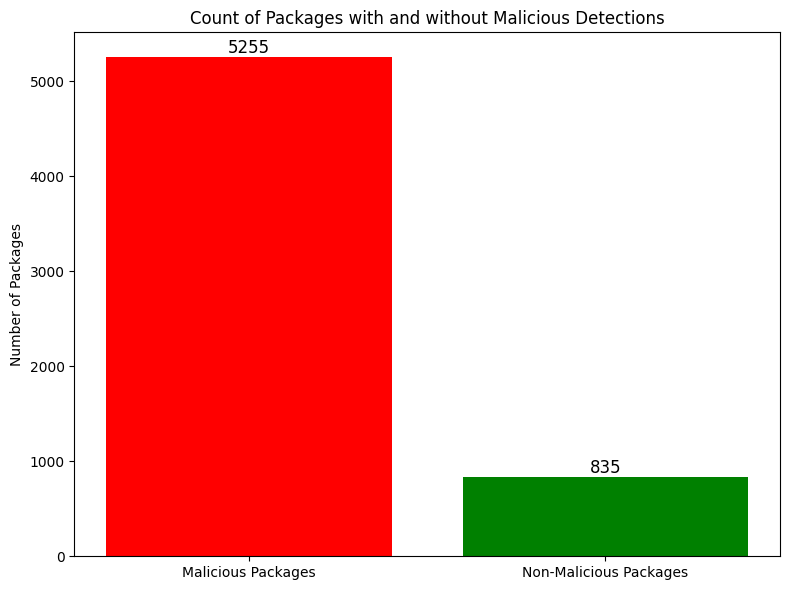

In [15]:
# Plotting the count of packages with and without malicious detections, with numbers displayed on top of the bars

malicious_packages = data.groupby('package_name')['malicious_count'].sum()
malicious_packages_count = (malicious_packages > 0).sum()
non_malicious_packages_count = (malicious_packages == 0).sum()

plt.figure(figsize=(8, 6))
bars = plt.bar(['Malicious Packages', 'Non-Malicious Packages'], [malicious_packages_count, non_malicious_packages_count], color=['red', 'green'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=12)

plt.title('Count of Packages with and without Malicious Detections')
plt.ylabel('Number of Packages')
plt.tight_layout()
plt.savefig('Count of Packages with and without Malicious Detections (unique packages).png', dpi=600)
plt.show()

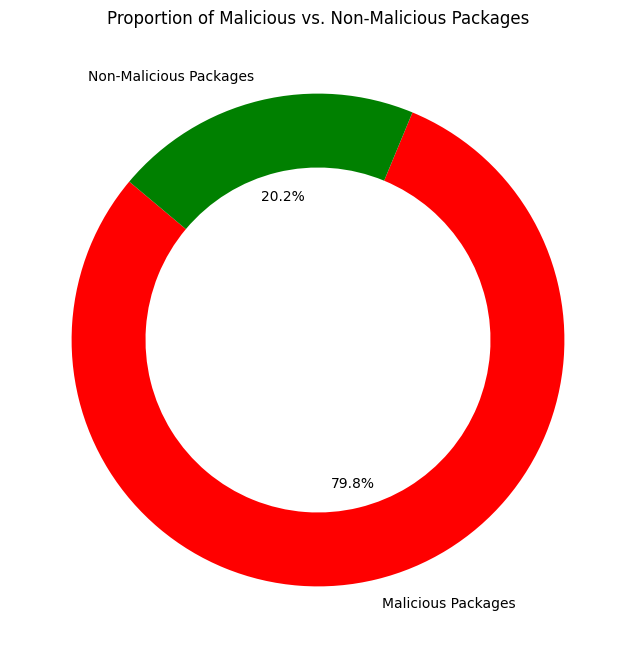

In [16]:
# Donut Chart for Malicious vs. Non-Malicious Packages

labels = ['Malicious Packages', 'Non-Malicious Packages']
sizes = [malicious_packages_count_all, non_malicious_packages_count_all]
colors = ['red', 'green'] 

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=dict(width=0.3))
plt.title('Proportion of Malicious vs. Non-Malicious Packages')
plt.gca().set_aspect('equal')
plt.savefig('Proportion of Malicious vs. Non-Malicious Packages (including all version).png', dpi=600)
plt.show()

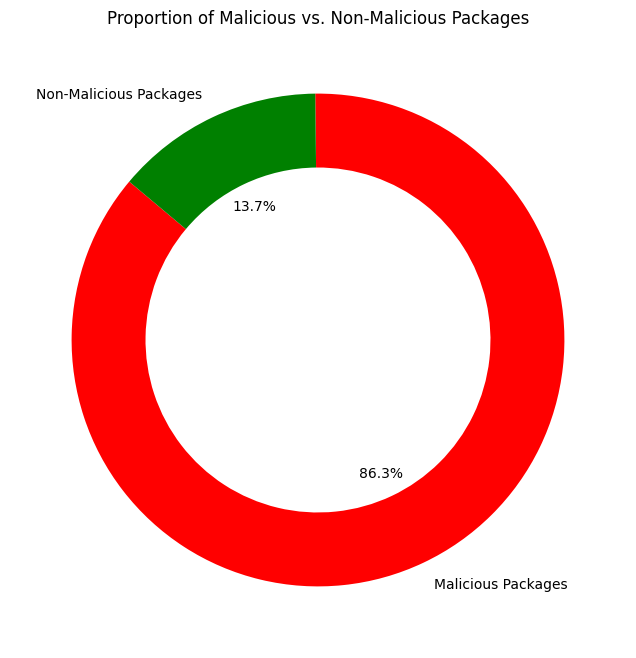

In [17]:
# Donut Chart for Malicious vs. Non-Malicious Packages

labels = ['Malicious Packages', 'Non-Malicious Packages']
sizes = [malicious_packages_count, non_malicious_packages_count]
colors = ['red', 'green'] 

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=dict(width=0.3))
plt.title('Proportion of Malicious vs. Non-Malicious Packages')
plt.gca().set_aspect('equal')
plt.savefig('Proportion of Malicious vs. Non-Malicious Packages (unique packages).png', dpi=600)
plt.show()

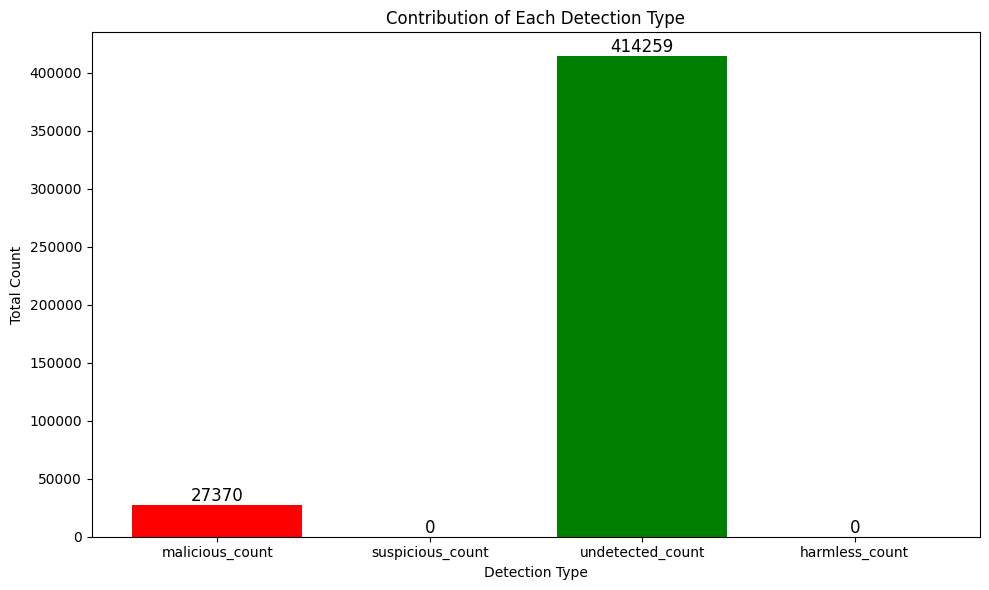

In [18]:
# Waterfall Chart for Detection Counts

detection_counts_total = data[['malicious_count', 'suspicious_count', 'undetected_count', 'harmless_count']].sum()

plt.figure(figsize=(10, 6))
bars = plt.bar(detection_counts_total.index, detection_counts_total.values, color=['red', '#FFA500', 'green', '#87CEFA'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=12)

plt.title('Contribution of Each Detection Type')
plt.xlabel('Detection Type')
plt.ylabel('Total Count')
plt.savefig('Proportion of Malicious vs. Non-Malicious Files in the Packages.png', dpi=600)
plt.tight_layout()
plt.show()